In [3]:
from ultralytics import YOLO
from PIL import Image
import cv2
from IPython.display import display, clear_output
import numpy as np


In [4]:
# Define the target width (adjust as needed)
target_width = 640


width = 720
height = 360
# Calculate the new dimensions while maintaining the aspect ratio
aspect_ratio = width / height
target_height = int(target_width / aspect_ratio)

target_width, target_height

(640, 320)


image 1/1 C:\Users\jasmi\Desktop\Research\Projects\making of video object dataset\bus.jpg: 480x640 3 cars, 1 bus, 141.6ms
Speed: 5.5ms preprocess, 141.6ms inference, 11.5ms postprocess per image at shape (1, 3, 480, 640)
Object type: bus
Coordinates: [100, 262, 1102, 752]
Probability: 0.93
---
Object type: car
Coordinates: [0, 508, 51, 553]
Probability: 0.55
---
Object type: car
Coordinates: [40, 499, 77, 539]
Probability: 0.39
---
Object type: car
Coordinates: [1159, 511, 1200, 540]
Probability: 0.28
---


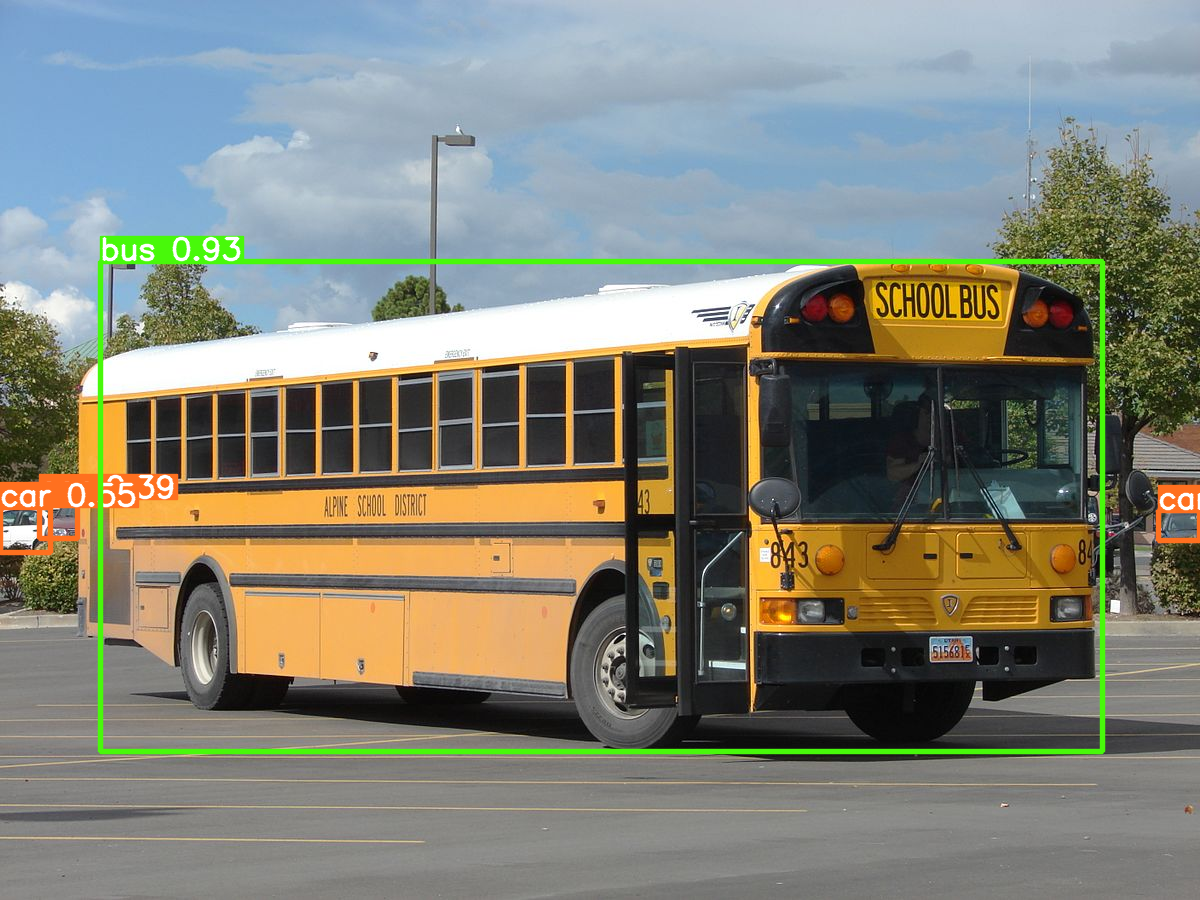

In [5]:
model = YOLO("yolov8n.pt")
results = model.predict("bus.jpg")

for box in results[0].boxes:
  class_id = results[0].names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

    
Image.fromarray(results[0].plot()[:,:,::-1])

In [13]:
import cv2
from ultralytics import YOLO
from IPython.display import clear_output, display
from PIL import Image
import numpy as np

# Load the YOLO model
model = YOLO("yolov8m")

# Open the video file
video_path = r"yt trailers\Moneyball (2011) Movie Trailer - HD - Brad Pitt.mp4"
cap = cv2.VideoCapture(video_path)

# Get video details
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Total frames: {total_frames}")
print(f"FPS: {fps}")
print(f"Frame width: {frame_width}")
print(f"Frame height: {frame_height}")

def process_frame(frame_number):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if not ret:
        return None

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform predictions on the frame
    results = model.predict(frame_rgb)

    # Annotate the frame with bounding boxes and class labels
    for box in results[0].boxes:
        class_id = results[0].names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        
        # Draw bounding box on the frame
        cv2.rectangle(frame, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
        
        # Add text with class and confidence
        text = f"{class_id} ({conf})"
        cv2.putText(frame, text, (cords[0], cords[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

def on_trackbar(val):
    frame = process_frame(val)
    if frame is not None:
        cv2.imshow('Video with Bounding Boxes', frame)

# Create a window and trackbar
cv2.namedWindow('Video with Bounding Boxes')
cv2.createTrackbar('Frame', 'Video with Bounding Boxes', 0, total_frames - 1, on_trackbar)

# Process the initial frame
on_trackbar(0)

while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Total frames: 3594
FPS: 23.958
Frame width: 640
Frame height: 360

0: 384x640 (no detections), 275.3ms
Speed: 4.5ms preprocess, 275.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 230.3ms
Speed: 7.4ms preprocess, 230.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 190.0ms
Speed: 0.0ms preprocess, 190.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 290.2ms
Speed: 0.0ms preprocess, 290.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 cup, 265.8ms
Speed: 0.0ms preprocess, 265.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 240.2ms
Speed: 0.0ms preprocess, 240.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 274.9ms
Speed: 0.0ms preprocess, 274.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x6

KeyboardInterrupt: 

In [55]:
# Load the YOLO model
model = YOLO("yolov8n.pt")

# Path to the video file
video_path = r"C:\Users\jasmi\Desktop\python script\SSC7-small.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
class_frequency = {}  # Dictionary to store class_id frequency

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    print(f"Processing Frame {frame_count}")

    # Perform object detection on the frame
    results = model.predict(frame)

    # Process detected objects
    for box in results[0].boxes:
        class_id = results[0].names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)

        # Print object information
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")

        # Update class_id frequency count
        if class_id in class_frequency:
            class_frequency[class_id] += 1
        else:
            class_frequency[class_id] = 1

# Print the frequency of each class_id
print("\nClass ID Frequency:")
for class_id, frequency in class_frequency.items():
    print(f"{class_id}: {frequency}")

# Release resources
cap.release()

Processing Frame 1

0: 288x640 10 persons, 218.9ms
Speed: 15.6ms preprocess, 218.9ms inference, 6.5ms postprocess per image at shape (1, 3, 288, 640)
Object type: person
Coordinates: [600, 312, 715, 689]
Probability: 0.82
---
Object type: person
Coordinates: [1078, 339, 1142, 647]
Probability: 0.78
---
Object type: person
Coordinates: [287, 296, 442, 748]
Probability: 0.77
---
Object type: person
Coordinates: [226, 404, 300, 635]
Probability: 0.68
---
Object type: person
Coordinates: [0, 423, 59, 691]
Probability: 0.64
---
Object type: person
Coordinates: [49, 436, 115, 680]
Probability: 0.56
---
Object type: person
Coordinates: [111, 429, 180, 659]
Probability: 0.52
---
Object type: person
Coordinates: [489, 410, 557, 634]
Probability: 0.48
---
Object type: person
Coordinates: [172, 431, 231, 646]
Probability: 0.46
---
Object type: person
Coordinates: [431, 427, 501, 630]
Probability: 0.3
---
Processing Frame 2

0: 288x640 11 persons, 237.1ms
Speed: 21.2ms preprocess, 237.1ms inferenc